In [76]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [77]:
import json, datetime

events_file = open('./router_events_time.json', 'r')
event_dict = json.load(events_file)['event_dict']

In [78]:
keywords = ['successfully joins', 'Deassociate(t):', '; User got online successfully', 'User logged off.']
#'detected interfere(t)'

x_time = np.array(sorted(event_dict.keys()))
y_all = np.array([
    [ event_dict[ts]['events'][keyword] if keyword in event_dict[ts]['events'] else 0 for ts in x_time ]
for keyword in keywords ])

print(x_time)
print(y_all)

['1479398400' '1479398401' '1479398402' ..., '1479484797' '1479484798'
 '1479484799']
[[1 3 1 ..., 0 1 0]
 [0 1 1 ..., 0 0 1]
 [0 0 0 ..., 0 0 2]
 [2 0 0 ..., 0 0 0]]


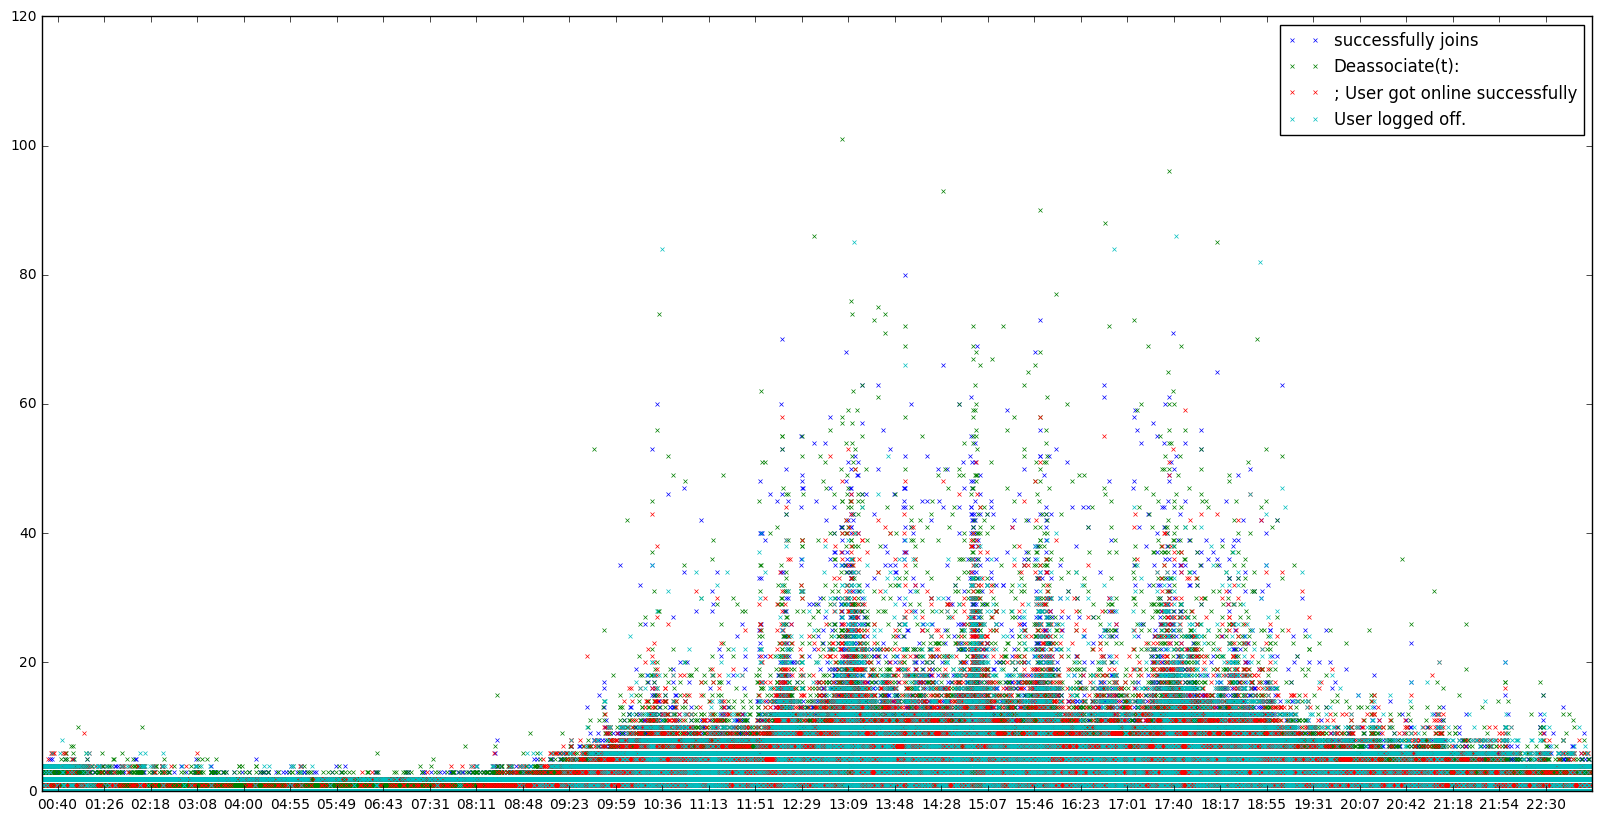

In [97]:
frame_size = 1
frame_limit = -1

# transform to datetime
x_datetime = np.array([ datetime.datetime.fromtimestamp(int(k)) for k in x_time ])

tick_spacing = 0.03
fig, ax = plt.subplots(1,1)

for index, keyword in enumerate(keywords):
    ax.plot_date(x_datetime[:frame_limit], y_all[index][:frame_limit], label=keyword, ms=3, fmt='x')
#plt.ylim(x_datetime[0], x_datetime[frame_limit])
ax.legend()

def formatTick(value, index):
    return x_datetime[int(len(x_datetime) / (1 / tick_spacing + 2) * index)].strftime('%H:%M')

ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatTick))
# time_start = x_datetime[0]
# time_end = x_datetime[frame_limit]
# plt.xticks(np.arange(time_start, time_end, 3600 * 2))
# index = 0
# plt.plot_date(x_datetime[:frame_limit], y_all[index][:frame_limit], ms=3, fmt='x')

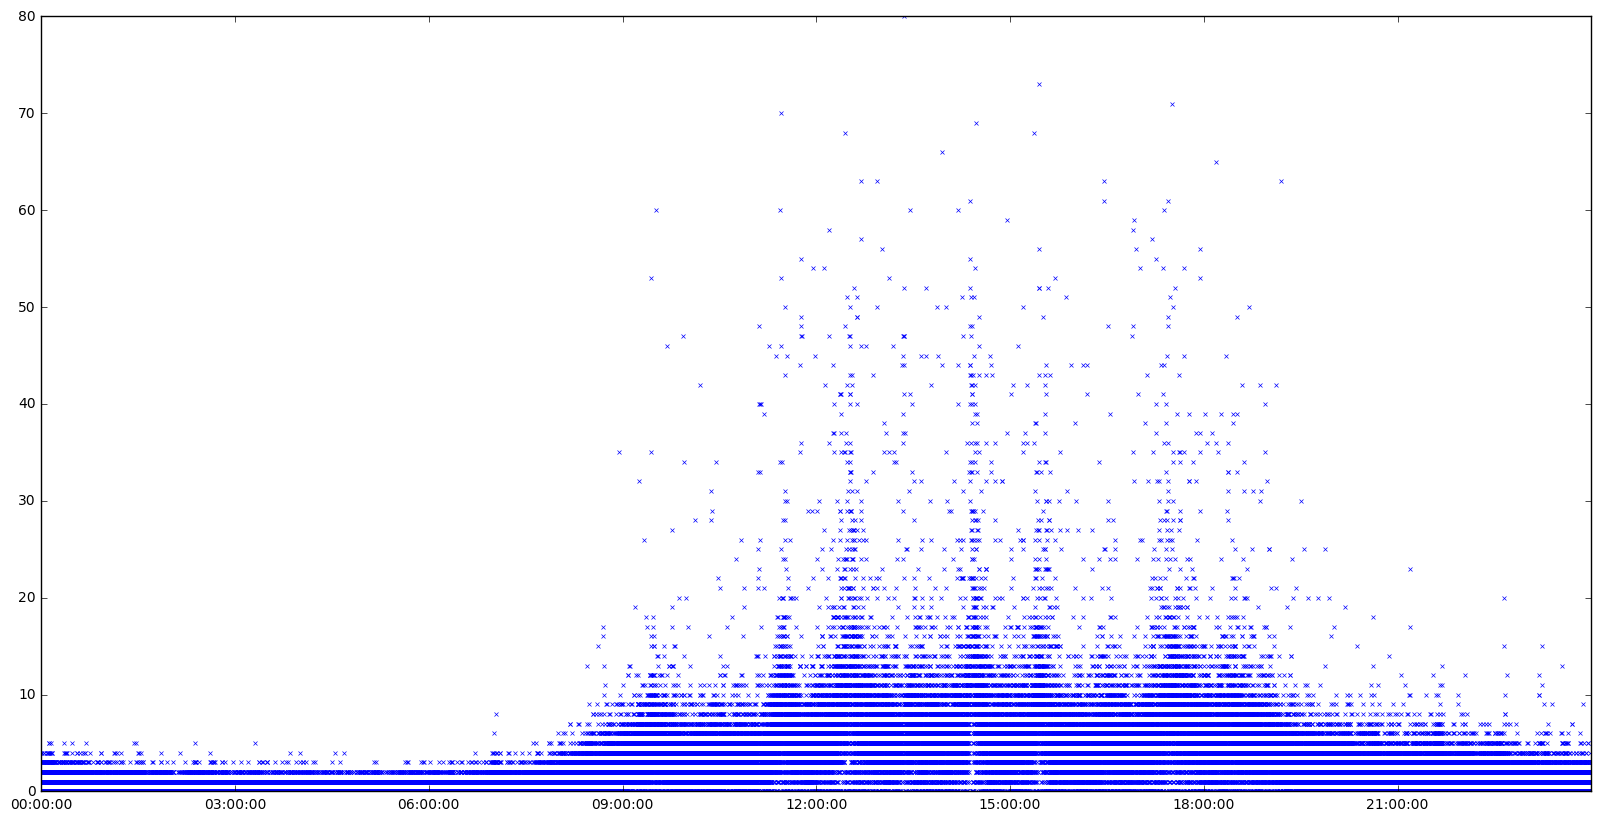

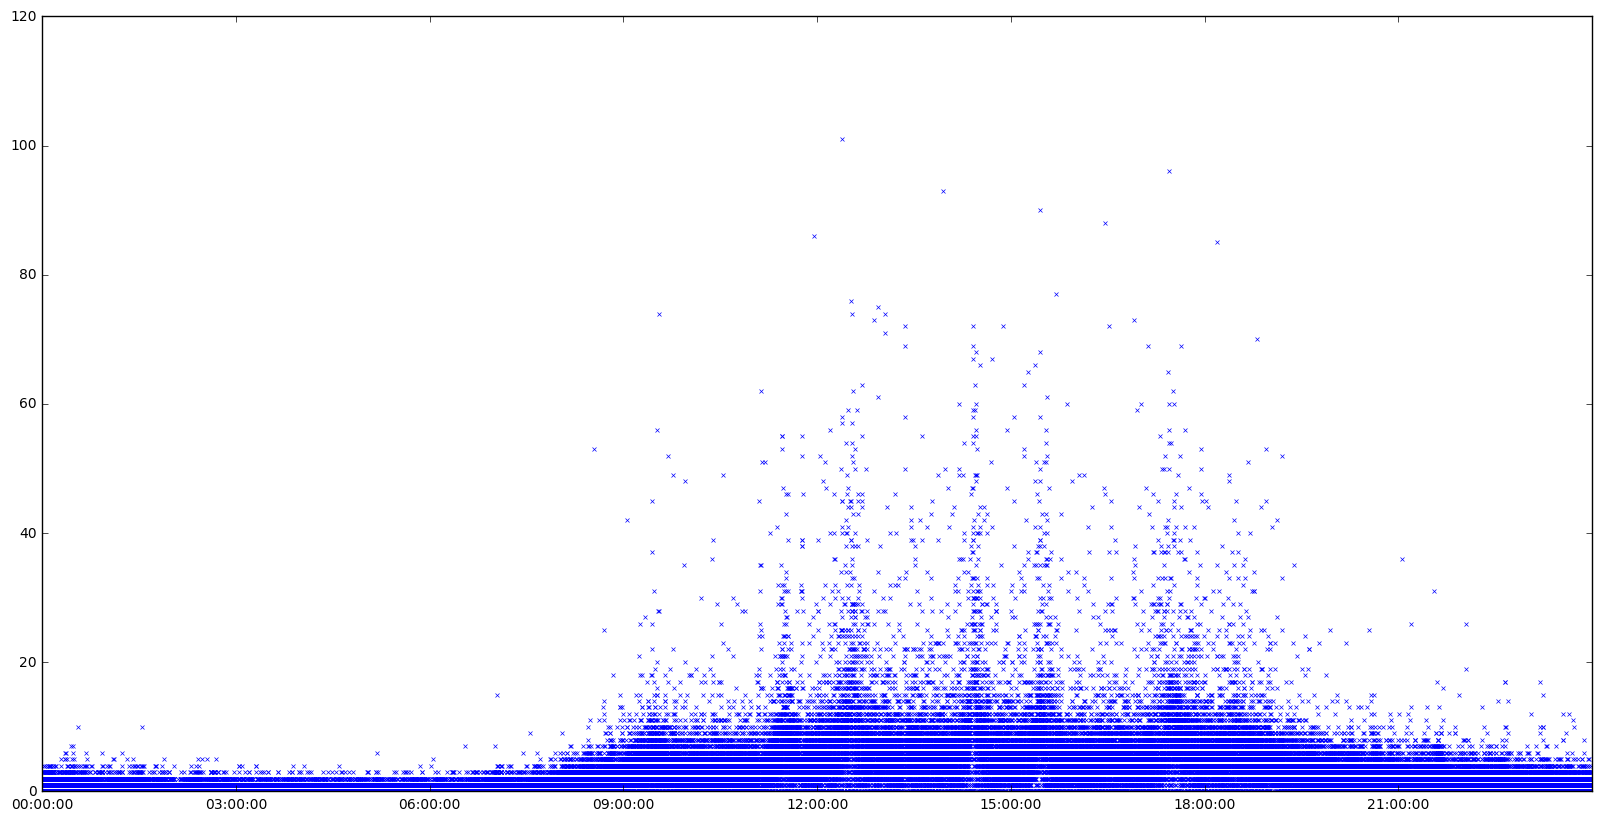

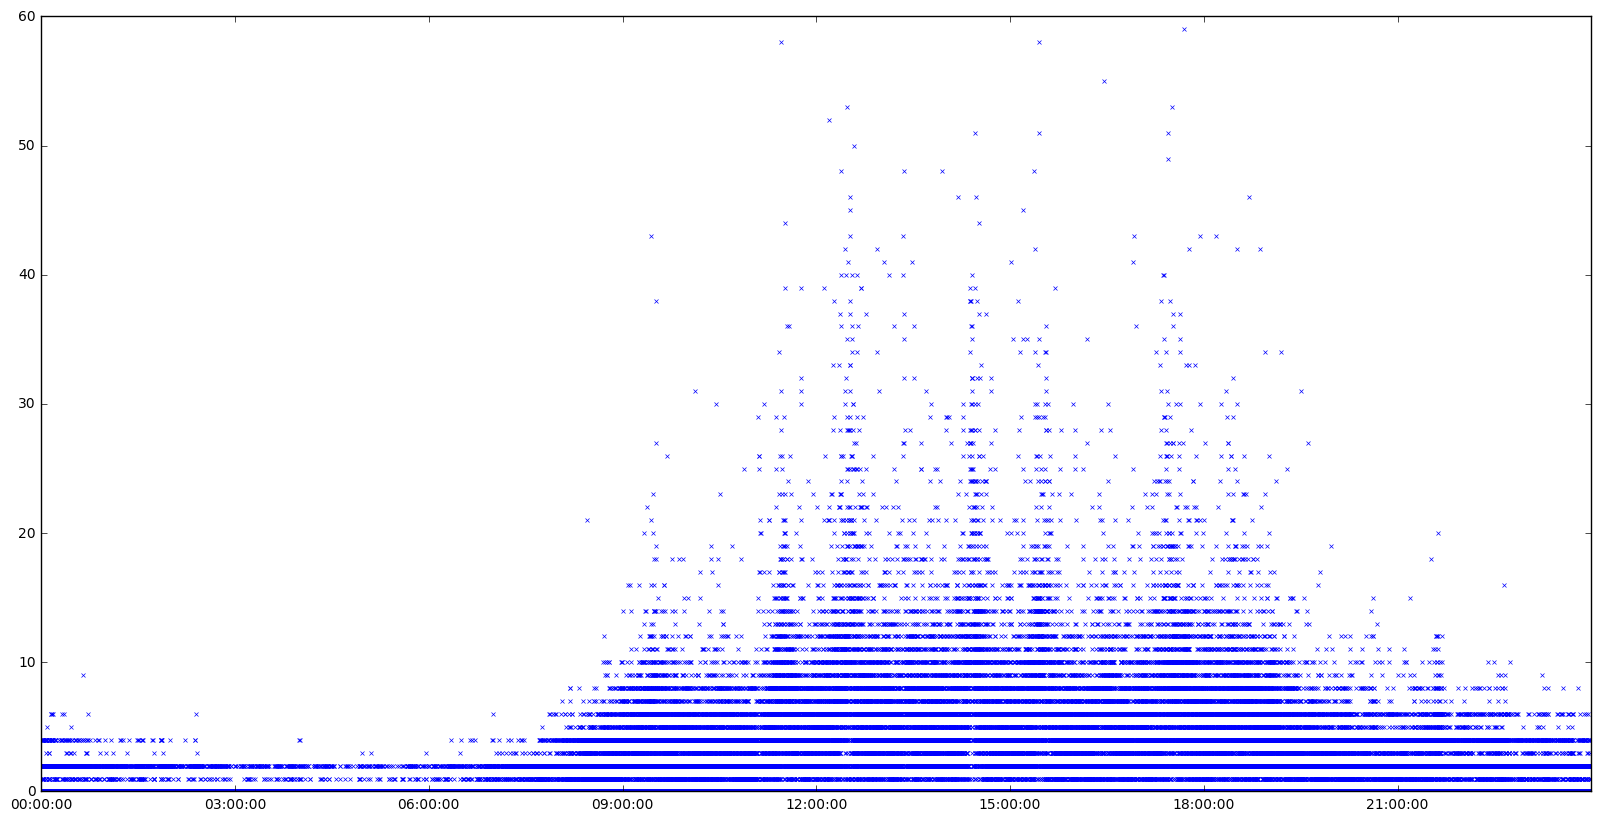